In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [308]:
df = pd.read_csv('/content/drive/My Drive/car_predict_price_copy.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,source,brand,type,link,cc,gas,sys,color,miles,year,price,locate,power,l_chair,seller,auto_chair,cd,media,back_radar,back_screen,ABS,window,hid,air_con,safe_bag,alu,keyless,gps,led,trc,tcs,ldws,aeb,ss,acc,hud,auto_windows,auto_side,alert,tpms,es,isofix,multi_wheel,auto_park,people,silde_door,female_used,turbo,warranty,fog_lights,blind_spot,electric_tailgate,whole_window,lcd,shift_paddles,epb,clc
0,U-car,Honda,Civic,https://usedcar.u-car.com.tw/objectdetail.aspx...,1800.0,汽油,自排,黑色,118900.0,2013.0,38.8,未知,2.0,1.0,全方位汽車商行\n,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,U-car,Toyota,Previa,https://usedcar.u-car.com.tw/objectdetail.aspx...,2400.0,汽油,手自排,銀色,50387.0,2017.0,118.8,未知,2.0,1.0,高昇汽車\n,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,U-car,Toyota,Sienta,https://usedcar.u-car.com.tw/objectdetail.aspx...,1800.0,汽油,自排,白色,25000.0,2018.0,62.6,未知,2.0,1.0,jiulicar9z鄭淵隆,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U-car,Volkswagen,Polo,https://usedcar.u-car.com.tw/objectdetail.aspx...,1000.0,汽油,手自排,白色,19752.0,2018.0,64.8,未知,2.0,0.0,1800mr游先生,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,U-car,Mazda,CX-5,https://usedcar.u-car.com.tw/objectdetail.aspx...,2000.0,汽油,手自排,白色,52887.0,2016.0,65.5,未知,2.0,1.0,順久汽車\n,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [309]:
# df.to_csv('/content/drive/My Drive/car_predict_price_copy.csv',index=False)

In [310]:
# df = df.drop(['source'],axis=1) #刪除column
# df

In [311]:
df[df.isnull().values==True] #確認有無空值

,source,brand,type,link,cc,gas,sys,color,miles,year,price,locate,power,l_chair,seller,auto_chair,cd,media,back_radar,back_screen,ABS,window,hid,air_con,safe_bag,alu,keyless,gps,led,trc,tcs,ldws,aeb,ss,acc,hud,auto_windows,auto_side,alert,tpms,es,isofix,multi_wheel,auto_park,people,silde_door,female_used,turbo,warranty,fog_lights,blind_spot,electric_tailgate,whole_window,lcd,shift_paddles,epb,clc


In [312]:
# #把price這欄依照上述轉為類別
# df_group=df
# df_group.loc[(df_group['price'] >= 10) & (df_group['price'] <=30),'price']=0
# df_group.loc[(df_group['price'] > 30) & (df_group['price'] <=60),'price']=1
# df_group.loc[(df_group['price'] > 60) & (df_group['price'] <=90),'price']=2
# df_group.loc[(df_group['price'] > 90) ,'price']=3

In [313]:
# #再檢視一次樣本,各個級數數量並無差太多,應該可以
# sns.distplot(df_group['price'], hist=True, kde=False, 
#              bins=int(4), color = 'blue',
#              hist_kws={'edgecolor':'black'})
# plt.title('distribution')
# plt.xlabel('price')
# plt.ylabel('sequence')

In [314]:
# fig = plt.figure()
# ax1 = fig.add_subplot(2, 2, 1)
# ax2 = fig.add_subplot(2, 2, 2)

Text(0, 0.5, 'count')

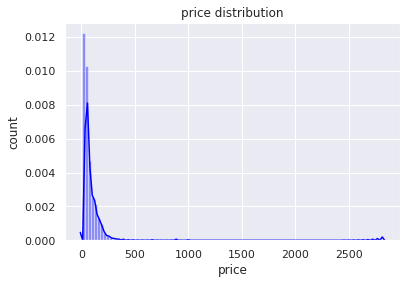

In [315]:
import seaborn as sns
sns.set(font='IPAPMincho', font_scale=1)
sns.distplot(df['price'],bins=int(100),hist=True,kde=True,rug=False,fit=None,color='blue',vertical=False,rug_kws=None,hist_kws=None,kde_kws=None)
# sns.distplot(df['price'], hist=True, kde=False, 
#              bins=int(100), color = 'blue',
#              hist_kws={'edgecolor':'black'})
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('count')

In [316]:
df['price'].describe()

count    48826.000000
mean        68.629583
std         80.071209
min          5.100000
25%         26.800000
50%         45.800000
75%         85.800000
max       2820.900000
Name: price, dtype: float64

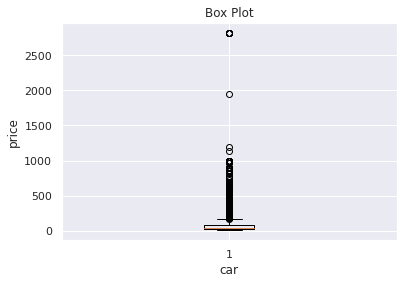

In [317]:
plot2 = plt.boxplot(df['price']) #盒鬚圖
plt.title('Box Plot')
plt.xlabel('car')
plt.ylabel('price')
plt.show()

In [318]:
Percentile = np.percentile(df['price'],[0,25,50,75,100]) #array( [   5.1 ,  26.8 ,  45.8 ,  85.8 , 2820.9])
IQR = Percentile[3] - Percentile[1] #59
UpLimit = Percentile[3]+IQR*1.5 #174.3
DownLimit = Percentile[1]-IQR*1.5 #-61.7
print('Percentile',Percentile,'IQR:',IQR,'UpLimit:',UpLimit,'DownLimit',DownLimit)

Percentile [   5.1   26.8   45.8   85.8 2820.9] IQR: 59.0 UpLimit: 174.3 DownLimit -61.7


In [319]:
#刪除超過上四分位+1.5倍IQR距離,約1785筆
delete_row = df[df['price']>UpLimit].index 
delete_row

Int64Index([    6,    30,    40,    43,    54,    69,    95,   113,   123,
              130,
            ...
            48546, 48563, 48564, 48566, 48573, 48587, 48591, 48603, 48613,
            48646],
           dtype='int64', length=3154)

In [320]:
df1 = df.drop(delete_row,inplace=False)

In [321]:
df1

,source,brand,type,link,cc,gas,sys,color,miles,year,price,locate,power,l_chair,seller,auto_chair,cd,media,back_radar,back_screen,ABS,window,hid,air_con,safe_bag,alu,keyless,gps,led,trc,tcs,ldws,aeb,ss,acc,hud,auto_windows,auto_side,alert,tpms,es,isofix,multi_wheel,auto_park,people,silde_door,female_used,turbo,warranty,fog_lights,blind_spot,electric_tailgate,whole_window,lcd,shift_paddles,epb,clc
0,U-car,Honda,Civic,https://usedcar.u-car.com.tw/objectdetail.aspx...,1800.0,汽油,自排,黑色,118900.0,2013.0,38.8,未知,2.0,1.0,全方位汽車商行\n,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,U-car,Toyota,Previa,https://usedcar.u-car.com.tw/objectdetail.aspx...,2400.0,汽油,手自排,銀色,50387.0,2017.0,118.8,未知,2.0,1.0,高昇汽車\n,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,U-car,Toyota,Sienta,https://usedcar.u-car.com.tw/objectdetail.aspx...,1800.0,汽油,自排,白色,25000.0,2018.0,62.6,未知,2.0,1.0,jiulicar9z鄭淵隆,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U-car,Volkswagen,Polo,https://usedcar.u-car.com.tw/objectdetail.aspx...,1000.0,汽油,手自排,白色,19752.0,2018.0,64.8,未知,2.0,0.0,1800mr游先生,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,U-car,Mazda,CX-5,https://usedcar.u-car.com.tw/objectdetail.aspx...,2000.0,汽油,手自排,白色,52887.0,2016.0,65.5,未知,2.0,1.0,順久汽車\n,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48821,ABC好車網,Mitsubishi,Zinger,https://www.abccar.com.tw/car/1414577?car_sour...,2400.0,汽油,自排,黑色,12376.0,2014.0,35.8,新北市,2.0,0.0,昇陽汽車,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48822,ABC好車網,Mitsubishi,Zinger,https://www.abccar.com.tw/car/1407809?car_sour...,2400.0,汽油,自排,灰色,8.0,2019.0,58.9,彰化縣,2.0,0.0,尚鼎汽車,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48823,ABC好車網,Mitsubishi,Zinger,https://www.abccar.com.tw/car/1418136?car_sour...,2400.0,汽油,自排,藍色,64647.0,2017.0,39.9,新北市,2.0,1.0,上展汽車,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48824,ABC好車網,Mitsubishi,Zinger,https://www.abccar.com.tw/car/1384143?car_sour...,2400.0,汽油,手自排,銀色,120000.0,2012.0,23.8,桃園市,2.0,1.0,捷揚汽車,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Text(0, 0.5, 'count')

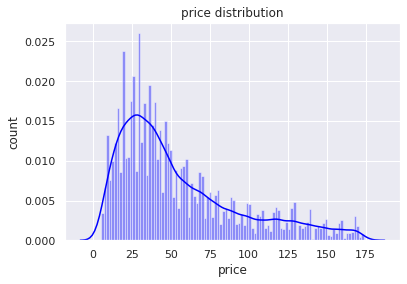

In [322]:
import seaborn as sns
# sns.distplot(df['price'],bins=None,hist=True,kde=True,rug=False,fit=None,color=None,vertical=False,rug_kws=None,hist_kws=None,kde_kws=None)
sns.distplot(df1['price'],bins=int(100),hist=True,kde=True,rug=False,fit=None,color='blue',vertical=False,rug_kws=None,hist_kws=None,kde_kws=None)
plt.title('price distribution')
plt.xlabel('price')
plt.ylabel('count')

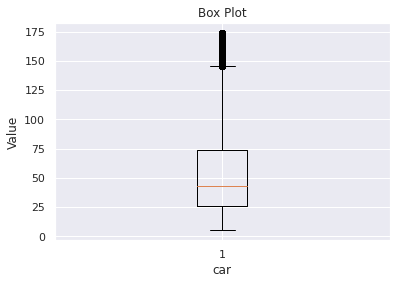

In [323]:
plt.boxplot(df1['price']) #盒鬚圖
plt.title('Box Plot')
plt.xlabel('car')
plt.ylabel('Value')
plt.show()

In [324]:
df1['price'].describe()

count    45672.000000
mean        54.852205
std         38.999771
min          5.100000
25%         25.800000
50%         42.800000
75%         73.800000
max        174.000000
Name: price, dtype: float64

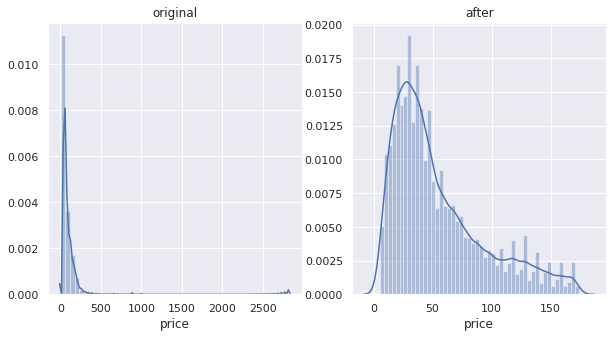

In [325]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title('original')
sns.distplot(df['price'], kde=True);

plt.subplot(1, 2, 2)
sns.set_style('dark')
plt.title('after');
sns.distplot(df1['price'], kde=True);

In [326]:
Percentile = np.percentile(df1['price'],[0,25,50,75,100]) #array( [  5.1  25.8  42.8  73.8 174. ])
IQR = Percentile[3] - Percentile[1] #48
UpLimit = Percentile[3]+IQR*1.5 #145.8
DownLimit = Percentile[1]-IQR*1.5 #-46.2
print('Percentile',Percentile,'IQR:',IQR,'UpLimit:',UpLimit,'DownLimit',DownLimit)

Percentile [  5.1  25.8  42.8  73.8 174. ] IQR: 48.0 UpLimit: 145.8 DownLimit -46.2


In [327]:
#刪除超過上四分位+1.5倍IQR距離,約3000筆
delete_row = df1[df1['price']>UpLimit].index 
delete_row

Int64Index([    7,    15,    41,    46,    49,    51,   115,   147,   155,
              182,
            ...
            48539, 48549, 48555, 48558, 48562, 48595, 48599, 48605, 48614,
            48749],
           dtype='int64', length=1785)

In [328]:
df1.drop(delete_row,inplace=True)
df1

,source,brand,type,link,cc,gas,sys,color,miles,year,price,locate,power,l_chair,seller,auto_chair,cd,media,back_radar,back_screen,ABS,window,hid,air_con,safe_bag,alu,keyless,gps,led,trc,tcs,ldws,aeb,ss,acc,hud,auto_windows,auto_side,alert,tpms,es,isofix,multi_wheel,auto_park,people,silde_door,female_used,turbo,warranty,fog_lights,blind_spot,electric_tailgate,whole_window,lcd,shift_paddles,epb,clc
0,U-car,Honda,Civic,https://usedcar.u-car.com.tw/objectdetail.aspx...,1800.0,汽油,自排,黑色,118900.0,2013.0,38.8,未知,2.0,1.0,全方位汽車商行\n,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,U-car,Toyota,Previa,https://usedcar.u-car.com.tw/objectdetail.aspx...,2400.0,汽油,手自排,銀色,50387.0,2017.0,118.8,未知,2.0,1.0,高昇汽車\n,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,U-car,Toyota,Sienta,https://usedcar.u-car.com.tw/objectdetail.aspx...,1800.0,汽油,自排,白色,25000.0,2018.0,62.6,未知,2.0,1.0,jiulicar9z鄭淵隆,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,U-car,Volkswagen,Polo,https://usedcar.u-car.com.tw/objectdetail.aspx...,1000.0,汽油,手自排,白色,19752.0,2018.0,64.8,未知,2.0,0.0,1800mr游先生,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,U-car,Mazda,CX-5,https://usedcar.u-car.com.tw/objectdetail.aspx...,2000.0,汽油,手自排,白色,52887.0,2016.0,65.5,未知,2.0,1.0,順久汽車\n,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48821,ABC好車網,Mitsubishi,Zinger,https://www.abccar.com.tw/car/1414577?car_sour...,2400.0,汽油,自排,黑色,12376.0,2014.0,35.8,新北市,2.0,0.0,昇陽汽車,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48822,ABC好車網,Mitsubishi,Zinger,https://www.abccar.com.tw/car/1407809?car_sour...,2400.0,汽油,自排,灰色,8.0,2019.0,58.9,彰化縣,2.0,0.0,尚鼎汽車,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48823,ABC好車網,Mitsubishi,Zinger,https://www.abccar.com.tw/car/1418136?car_sour...,2400.0,汽油,自排,藍色,64647.0,2017.0,39.9,新北市,2.0,1.0,上展汽車,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
48824,ABC好車網,Mitsubishi,Zinger,https://www.abccar.com.tw/car/1384143?car_sour...,2400.0,汽油,手自排,銀色,120000.0,2012.0,23.8,桃園市,2.0,1.0,捷揚汽車,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
df1.columns

Index(['source', 'brand', 'type', 'link', 'cc', 'gas', 'sys', 'color', 'miles',
       'year', 'price', 'locate', 'power', 'l_chair', 'seller', 'auto_chair',
       'cd', 'media', 'back_radar', 'back_screen', 'ABS', 'window', 'hid',
       'air_con', 'safe_bag', 'alu', 'keyless', 'gps', 'led', 'trc', 'tcs',
       'ldws', 'aeb', 'ss', 'acc', 'hud', 'auto_windows', 'auto_side', 'alert',
       'tpms', 'es', 'isofix', 'multi_wheel', 'auto_park', 'people',
       'silde_door', 'female_used', 'turbo', 'warranty', 'fog_lights',
       'blind_spot', 'electric_tailgate', 'whole_window', 'lcd',
       'shift_paddles', 'epb', 'clc'],
      dtype='object')

In [330]:
df1['price'].describe()

count    43887.000000
mean        50.617618
std         33.485834
min          5.100000
25%         25.800000
50%         40.000000
75%         68.800000
max        145.800000
Name: price, dtype: float64

In [331]:
Percentile = np.percentile(df1['price'],[0,25,50,90,100])
Percentile[3]

105.0

In [332]:
delete_row = df1[df1['price']>Percentile[3]].index 
delete_row

Int64Index([    1,    23,    31,    37,    39,    42,    50,    52,    59,
               63,
            ...
            48571, 48572, 48575, 48577, 48581, 48598, 48601, 48607, 48612,
            48638],
           dtype='int64', length=4320)

In [333]:
df1.drop(delete_row,inplace=True)

In [334]:
df1 = df1.drop(['source','link','seller','locate'],axis=1)

In [335]:
df1.columns

Index(['brand', 'type', 'cc', 'gas', 'sys', 'color', 'miles', 'year', 'price',
       'power', 'l_chair', 'auto_chair', 'cd', 'media', 'back_radar',
       'back_screen', 'ABS', 'window', 'hid', 'air_con', 'safe_bag', 'alu',
       'keyless', 'gps', 'led', 'trc', 'tcs', 'ldws', 'aeb', 'ss', 'acc',
       'hud', 'auto_windows', 'auto_side', 'alert', 'tpms', 'es', 'isofix',
       'multi_wheel', 'auto_park', 'people', 'silde_door', 'female_used',
       'turbo', 'warranty', 'fog_lights', 'blind_spot', 'electric_tailgate',
       'whole_window', 'lcd', 'shift_paddles', 'epb', 'clc'],
      dtype='object')

In [336]:
df1['year'] = df1['year'].astype(object)
df1.dtypes

brand                 object
type                  object
cc                   float64
gas                   object
sys                   object
color                 object
miles                float64
year                  object
price                float64
power                float64
l_chair              float64
auto_chair           float64
cd                   float64
media                float64
back_radar           float64
back_screen          float64
ABS                  float64
window               float64
hid                  float64
air_con              float64
safe_bag             float64
alu                  float64
keyless              float64
gps                  float64
led                  float64
trc                  float64
tcs                  float64
ldws                 float64
aeb                  float64
ss                   float64
acc                  float64
hud                  float64
auto_windows         float64
auto_side            float64
alert         

In [337]:
df1_1 = df1[['brand','type','gas','sys','color','year']]
df1_2 = df1[['cc','miles','power', 'l_chair', 'auto_chair', 'cd', 'media', 'back_radar',
       'back_screen', 'ABS', 'window', 'hid', 'air_con', 'safe_bag', 'alu',
       'keyless', 'gps', 'led', 'trc', 'tcs', 'ldws', 'aeb', 'ss', 'acc',
       'hud', 'auto_windows', 'auto_side', 'alert', 'tpms', 'es', 'isofix',
       'multi_wheel', 'auto_park', 'people', 'silde_door', 'female_used',
       'turbo', 'warranty', 'fog_lights', 'blind_spot', 'electric_tailgate',
       'whole_window', 'lcd', 'shift_paddles', 'epb', 'clc','price']]

In [361]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# import scipy as sp
# cc = sp.corrcoef(df1_2, rowvar=False)
# VIF = np.linalg.inv(cc)
# VIF.diagonal()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.corrcoef is deprecated and will be removed in SciPy 2.0.0, use numpy.corrcoef instead
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan])

In [338]:
from sklearn.preprocessing import OneHotEncoder
df1_1_dum = pd.get_dummies(df1_1)
df1_1_dum = pd.DataFrame(df1_1_dum)
df1_1_dum

,brand_Acura,brand_Alfa Romeo,brand_Asia,brand_Audi,brand_Austin,brand_BMW,brand_Buick,brand_CMC,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Citroen,brand_DFSK,brand_Daihatsu,brand_Dodge,brand_Fiat,brand_Ford,brand_Formosa,brand_Foton,brand_Hino,brand_Honda,brand_Hummer,brand_Hyundai,brand_IVECO,brand_Infiniti,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land Rover,brand_Lexus,brand_Lincoln,brand_Luxgen,brand_Mahindra,brand_Maserati,brand_Mazda,brand_Mercedes-Benz,brand_Mini,brand_Mitsubishi,brand_Nissan,...,color_黑棕色,color_黑灰色,color_黑白色,color_黑紅色,color_黑綠色,color_黑色,year_1983.0,year_1988.0,year_1989.0,year_1990.0,year_1991.0,year_1992.0,year_1993.0,year_1994.0,year_1995.0,year_1996.0,year_1997.0,year_1998.0,year_1999.0,year_2000.0,year_2001.0,year_2002.0,year_2003.0,year_2004.0,year_2005.0,year_2006.0,year_2007.0,year_2008.0,year_2009.0,year_2010.0,year_2011.0,year_2012.0,year_2013.0,year_2014.0,year_2015.0,year_2016.0,year_2017.0,year_2018.0,year_2019.0,year_2020.0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
48822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
48823,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [339]:
df1_2['price'].describe()

count    39567.000000
mean        42.607562
std         24.041975
min          5.100000
25%         23.800000
50%         37.800000
75%         58.800000
max        105.000000
Name: price, dtype: float64

In [340]:
df2 = pd.concat([df1_1_dum,df1_2], axis=1, join='inner').sort_index()
df2

,brand_Acura,brand_Alfa Romeo,brand_Asia,brand_Audi,brand_Austin,brand_BMW,brand_Buick,brand_CMC,brand_Cadillac,brand_Chevrolet,brand_Chrysler,brand_Citroen,brand_DFSK,brand_Daihatsu,brand_Dodge,brand_Fiat,brand_Ford,brand_Formosa,brand_Foton,brand_Hino,brand_Honda,brand_Hummer,brand_Hyundai,brand_IVECO,brand_Infiniti,brand_Isuzu,brand_Jaguar,brand_Jeep,brand_Kia,brand_Land Rover,brand_Lexus,brand_Lincoln,brand_Luxgen,brand_Mahindra,brand_Maserati,brand_Mazda,brand_Mercedes-Benz,brand_Mini,brand_Mitsubishi,brand_Nissan,...,back_radar,back_screen,ABS,window,hid,air_con,safe_bag,alu,keyless,gps,led,trc,tcs,ldws,aeb,ss,acc,hud,auto_windows,auto_side,alert,tpms,es,isofix,multi_wheel,auto_park,people,silde_door,female_used,turbo,warranty,fog_lights,blind_spot,electric_tailgate,whole_window,lcd,shift_paddles,epb,clc,price
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,38.8
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.6
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.8
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.5
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,59.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48821,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.8
48822,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,58.9
48823,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39.9
48824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.8


In [ ]:
"""
相關係數矩陣
"""
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp
cc = sp.corrcoef(df2, rowvar=False)
plt.rcParams['figure.figsize'] = (18,10)
sns.heatmap(df2.corr(), vmin=-1, vmax=1, center=0,
            square=True, annot = True, cmap = 'RdYlGn')
plt.show()

In [341]:
X = df2.drop(['price'],axis=1).values
# y = finaldf.price
y = pd.DataFrame(df2['price']).values

In [342]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [343]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [344]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestRegressor(n_estimators=200, random_state=0,bootstrap =True)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [345]:
from sklearn import metrics

print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error(RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
MAPE = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('MAPE',MAPE)
print('Mean Absolute Percentage Error (MAPE):', round(MAPE * 100, 2),'%')

Mean Absolute Error(MAE): 6.668559661978285
Mean Squared Error(MSE): 103.24273163347131
Root Mean Squared Error(RMSE): 10.16084305722076
MAPE 0.8878491691748874
Mean Absolute Percentage Error (MAPE): 88.78 %


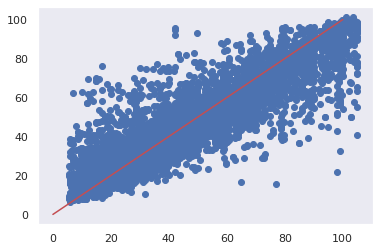

In [346]:
plt.scatter(y_test, y_pred)
plt.plot([0,100],[0,100],'r')

In [363]:
# #n_clusters可以輸入你要分幾群
# from sklearn.cluster import AgglomerativeClustering
# cluster = AgglomerativeClustering(n_clusters=20, affinity='euclidean', linkage='ward')  
# result = cluster.fit_predict(df2)
# [print("第",i,"群數量為:",len(np.where(result==i)[0])) for i in range(20)]

KeyboardInterrupt: ignored

In [ ]:
# plt.figure(figsize=(16, 9))  
# plt.scatter(y_test, y_pred, c=cluster.labels_) 

In [347]:
##linearRegression
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

In [348]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [349]:
mse = np.mean((lm.predict(X) - y) ** 2)
r_squared = lm.score(X, y)
adj_r_squared = r_squared - (1 - r_squared) * (X.shape[1] / (X.shape[0] - X.shape[1] - 1))

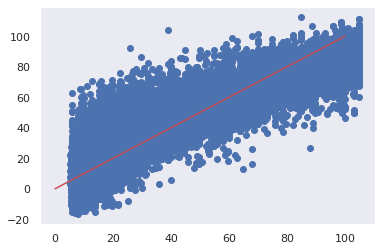

In [350]:
plt.scatter(y, lm.predict(X))
plt.plot([0,100],[0,100],'r')

In [351]:
print('MSE:',mse)
print('R_squared:',r_squared)
print('adj_r_squared:',adj_r_squared)
MAPE = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('MAPE:',MAPE)

MSE: 118.22873503375774
R_squared: 0.7954527007809556
adj_r_squared: 0.7900345455726888
MAPE: 0.8878491691748874


In [352]:
# #把price這欄依照上述轉為類別
# df_group=df1
# df_group.loc[(df_group['price'] >= 10) & (df_group['price'] <=20),'price']=0
# df_group.loc[(df_group['price'] > 20) & (df_group['price'] <=30),'price']=1
# df_group.loc[(df_group['price'] > 30) & (df_group['price'] <=90),'price']=2
# df_group.loc[(df_group['price'] > 90) ,'price']=3

In [353]:
# #再檢視一次樣本,各個級數數量並無差太多,應該可以
# sns.distplot(df_group['price'], hist=True, kde=False, 
#              bins=int(4), color = 'blue',
#              hist_kws={'edgecolor':'black'})
# plt.title('distribution')
# plt.xlabel('price')
# plt.ylabel('sequence')

In [354]:
# df = df[['brand', 'type', 'gas', 'sys', 'color', 'cc','miles', 'year',
#        'power', 'l_chair', 'auto_chair', 'cd', 'media', 'back_radar',
#        'back_screen', 'ABS', 'window', 'hid', 'air_con', 'safe_bag', 'alu',
#        'keyless', 'gps', 'led', 'trc', 'tcs', 'ldws', 'aeb', 'ss', 'acc',
#        'hud', 'auto_windows', 'auto_side', 'alert', 'tpms', 'es', 'isofix',
#        'multi_wheel', 'auto_park', 'people', 'silde_door', 'female_used',
#        'turbo', 'warranty', 'fog_lights', 'blind_spot', 'electric_tailgate',
#        'whole_window', 'lcd', 'shift_paddles', 'epb', 'clc','price']]
# df

In [355]:
# df1 = df1[["brand","type","gas","sys","color"]]
# df1